Sentiment Analysis on Amazon Product Reviews || Lochan Basyal

Datasets: https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products

In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from collections import Counter
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.utils import shuffle

In [3]:
#load and read the datasets
data = pd.read_csv('/content/drive/MyDrive/data/1429_1.csv')

<ipython-input-3-b8e2b29630c1>:2: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/data/1429_1.csv')


In [4]:
data.shape

(34660, 21)

In [5]:
data.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [7]:
data.nunique()

id                         42
name                       48
asins                      41
brand                       6
categories                 41
keys                       42
manufacturer                2
reviews.date             1078
reviews.dateAdded        1941
reviews.dateSeen         3911
reviews.didPurchase         1
reviews.doRecommend         2
reviews.id                  1
reviews.numHelpful         97
reviews.rating              5
reviews.sourceURLs      11929
reviews.text            34659
reviews.title           19767
reviews.userCity            0
reviews.userProvince        0
reviews.username        26789
dtype: int64

In [8]:
data['reviews.doRecommend'].value_counts()

True     32682
False     1384
Name: reviews.doRecommend, dtype: int64

In [9]:
data['reviews.rating'].value_counts()

5.0    23775
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: reviews.rating, dtype: int64

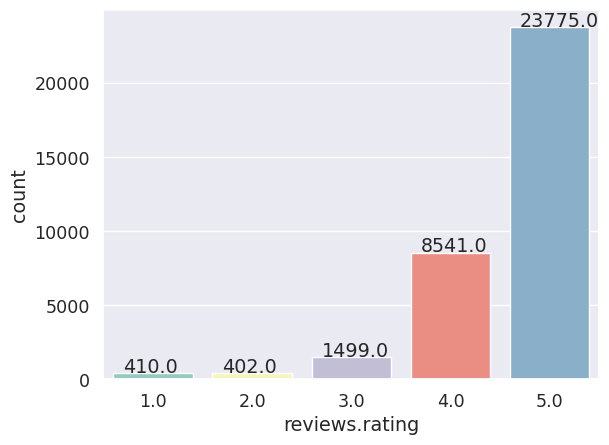

In [10]:
sns.set_theme(style='darkgrid',font_scale=1.15,palette="Set3")
ax=sns.countplot(x='reviews.rating', data=data)
for p in ax.patches:
  ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Reviews with Low/negative ratings are showing less

Now, combining other datasets given

In [11]:
data1 = pd.read_csv('/content/drive/MyDrive/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')
data2 = pd.read_csv('/content/drive/MyDrive/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   object 
 15  reviews.doRecommend  5000 non-null   b

In [13]:
data1['reviews.rating'].value_counts()

5    3478
4    1208
3     197
1      63
2      54
Name: reviews.rating, dtype: int64

In [14]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [15]:
data2['reviews.rating'].value_counts()

5    19897
4     5648
3     1206
1      965
2      616
Name: reviews.rating, dtype: int64

In [16]:
#concatinate the data
data = pd.concat([data, data1, data2])

In [17]:
data.shape

(67992, 27)

In [18]:
data=data.reset_index()

In [19]:
data.drop(columns=['index'], inplace=True)

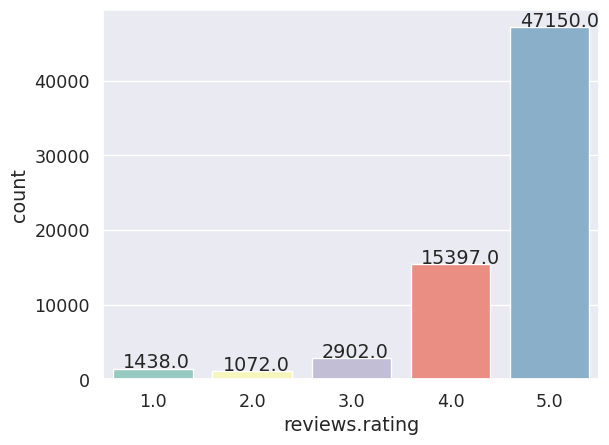

In [20]:
sns.set_theme(style='darkgrid',font_scale=1.15,palette="Set3")
ax=sns.countplot(x='reviews.rating',data=data)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [21]:
#now checking null values

In [22]:
data.isnull().sum()

id                          0
name                     6760
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               39
reviews.dateAdded       42901
reviews.dateSeen            0
reviews.didPurchase     67982
reviews.doRecommend     12840
reviews.id              67921
reviews.numHelpful      12746
reviews.rating             33
reviews.sourceURLs          0
reviews.text                1
reviews.title              18
reviews.userCity        67992
reviews.userProvince    67992
reviews.username            2
dateAdded               34660
dateUpdated             34660
primaryCategories       34660
imageURLs               34660
manufacturerNumber      34660
sourceURLs              34660
dtype: int64

In [23]:
data.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,dateAdded,dateUpdated,primaryCategories,imageURLs,manufacturerNumber,sourceURLs
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,Kindle,NaN,NaN,Adapter,NaN,NaN,NaN,NaN,NaN,NaN
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,very fast,NaN,NaN,truman,NaN,NaN,NaN,NaN,NaN,NaN
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ,NaN,NaN,NaN,NaN,NaN,NaN
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,Good!!!,NaN,NaN,Shacks,NaN,NaN,NaN,NaN,NaN,NaN
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,Fantastic Tablet for kids,NaN,NaN,explore42,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data.drop(['id','asins','name','brand','categories','keys','reviews.numHelpful','reviews.userCity','reviews.userProvince','reviews.sourceURLs','manufacturer','reviews.date','reviews.dateAdded','reviews.id','reviews.dateSeen','reviews.didPurchase','reviews.username','dateAdded','dateUpdated','primaryCategories','imageURLs','manufacturerNumber','sourceURLs','reviews.userProvince','reviews.userCity'],axis=1,inplace=True)

In [25]:
data.head()

,reviews.doRecommend,reviews.rating,reviews.text,reviews.title
0,True,5.0,This product so far has not disappointed. My c...,Kindle
1,True,5.0,great for beginner or experienced person. Boug...,very fast
2,True,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.
3,True,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!
4,True,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids


In [26]:
data.isnull().sum()


reviews.doRecommend    12840
reviews.rating            33
reviews.text               1
reviews.title             18
dtype: int64

In [27]:
#drop rows with reviews.rating that's null

In [28]:
data.dropna(subset = ['reviews.rating'],inplace=True)

In [29]:
data.isnull().sum()

reviews.doRecommend    12807
reviews.rating             0
reviews.text               1
reviews.title             18
dtype: int64

In [30]:
data.fillna("",inplace=True)

In [31]:
data.isnull().sum()

reviews.doRecommend    0
reviews.rating         0
reviews.text           0
reviews.title          0
dtype: int64

In [32]:
#combining "reviews.text" and "reviews.title" column

In [33]:
data['ReviewText'] = data['reviews.text']+data['reviews.title']
data['ReviewText'][0]

'This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.Kindle'

In [34]:
#drop "reviews.text" and "reviews.title"
data.drop(['reviews.text','reviews.title'],axis=1,inplace=True)

In [35]:
data.rename(columns={'reviews.rating':'Ratings'}, inplace=True)
data.rename(columns={'reviews.doRecommend':'Recommend'}, inplace=True)

In [36]:
def sentiment(rating):
    """
    This function return sentiment value based on the ratings.
    """
    
    if rating==3.0:
        value='Neutral'
    elif rating==4.0 or rating==5.0:
        value='Positive'
    elif rating==1.0 or rating==2.0:
        value='Negative'
    else:
        value = -1
    
    return value

data['Sentiment'] = data.apply(lambda row : sentiment(row['Ratings']), axis=1)

In [37]:
data.head()

,Recommend,Ratings,ReviewText,Sentiment
0,True,5.0,This product so far has not disappointed. My c...,Positive
1,True,5.0,great for beginner or experienced person. Boug...,Positive
2,True,5.0,Inexpensive tablet for him to use and learn on...,Positive
3,True,4.0,I've had my Fire HD 8 two weeks now and I love...,Positive
4,True,5.0,I bought this for my grand daughter when she c...,Positive


In [38]:
data.Sentiment.value_counts()

Positive    62547
Neutral      2902
Negative     2510
Name: Sentiment, dtype: int64

In [39]:
data.Ratings.value_counts()

5.0    47150
4.0    15397
3.0     2902
1.0     1438
2.0     1072
Name: Ratings, dtype: int64

In [40]:
#create func to get subjectivity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create func to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#create 2 columns subjectivity,polarity

data['Subjectivity'] = data['ReviewText'].apply(getSubjectivity)
data['Polarity'] = data['ReviewText'].apply(getPolarity)

In [41]:
#Create a func to compute the Negative , Neutral and positive analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
data['Analysis'] = data['Polarity'].apply(getAnalysis)

In [42]:
data.head()

,Recommend,Ratings,ReviewText,Sentiment,Subjectivity,Polarity,Analysis
0,True,5.0,This product so far has not disappointed. My c...,Positive,0.783333,0.325000,Positive
1,True,5.0,great for beginner or experienced person. Boug...,Positive,0.750000,0.600000,Positive
2,True,5.0,Inexpensive tablet for him to use and learn on...,Positive,0.450000,0.350000,Positive
3,True,4.0,I've had my Fire HD 8 two weeks now and I love...,Positive,0.731250,0.399583,Positive
4,True,5.0,I bought this for my grand daughter when she c...,Positive,0.616226,0.368056,Positive


In [44]:
#top 5 reviews with highest polarity
data.nlargest(5, ['Polarity']).ReviewText

48     Tablet is perfect for beginners who just want ...
248    Excellent resource for children video streamin...
250    best choice under 100$ in marketamazon is the ...
274    It's a excellent tablet for my kid she downloa...
278    Love everything about my Kindle. I'm a long-te...
Name: ReviewText, dtype: object

In [45]:
#top 5 reviews with lowest polarity
data.nsmallest(5, ['Polarity']).ReviewText

3947     I don't like this tablet as Android is not wor...
16563    I bought this for my grandson and it hasn't di...
31801    Works just as well as my Rokus, however the in...
31889    Goodbye outrageous satellite bills...hello Ama...
37521    I bought this for my grandson and it hasn't di...
Name: ReviewText, dtype: object

<ipython-input-47-65e9106d1454>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Analysis')['Sentiment','Analysis'].nunique().plot.bar(rot=0)


<Axes: xlabel='Analysis'>

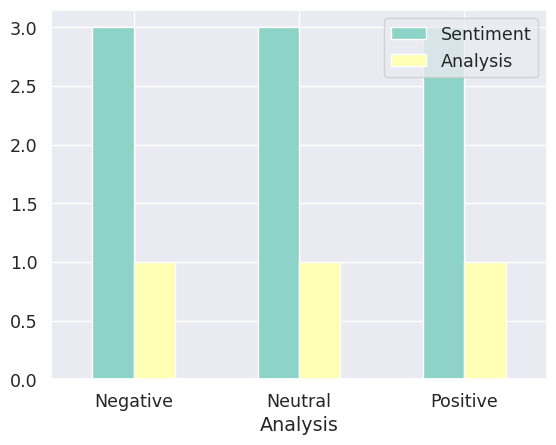

In [47]:
#Compare value_Counts of columns Sentiment(made using Ratings) and Analysis(made using Polarity).
data.groupby('Analysis')['Sentiment','Analysis'].nunique().plot.bar(rot=0)

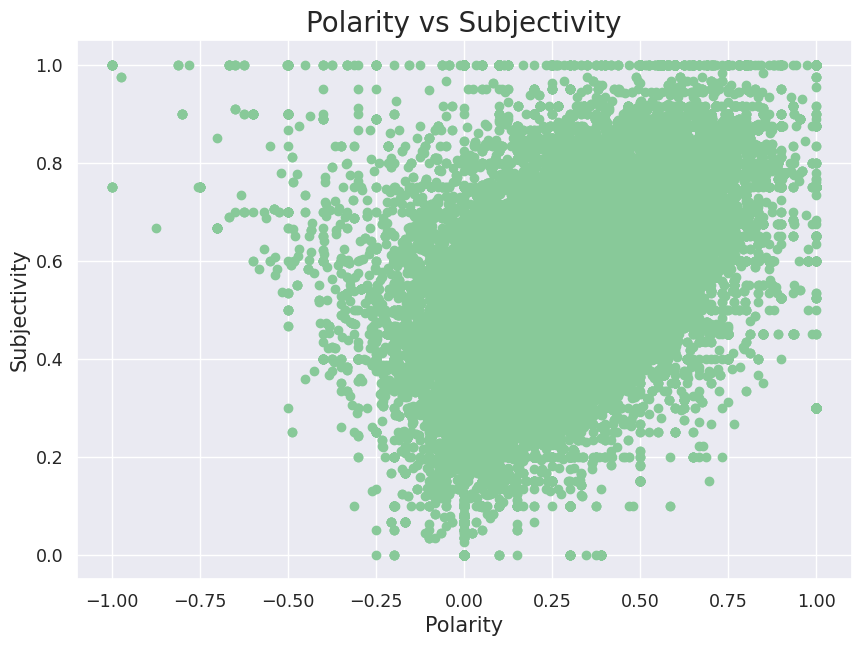

In [48]:
plt.figure(figsize=(10,7))
plt.scatter(data['Polarity'], data['Subjectivity'], color='#88c999')
plt.title("Polarity vs Subjectivity", fontsize=20)
plt.xlabel('Polarity',fontsize=15)
plt.ylabel('Subjectivity',fontsize=15)
plt.show();

In [51]:
#encoding target variable-Sentiment with label_encoder
label_encoder = preprocessing.LabelEncoder() 

data['Sentiment']= label_encoder.fit_transform(data['Sentiment']) 
  
print(data['Sentiment'].unique())
print(data['Sentiment'].value_counts())

[2 0 1]
2    62547
1     2902
0     2510
Name: Sentiment, dtype: int64


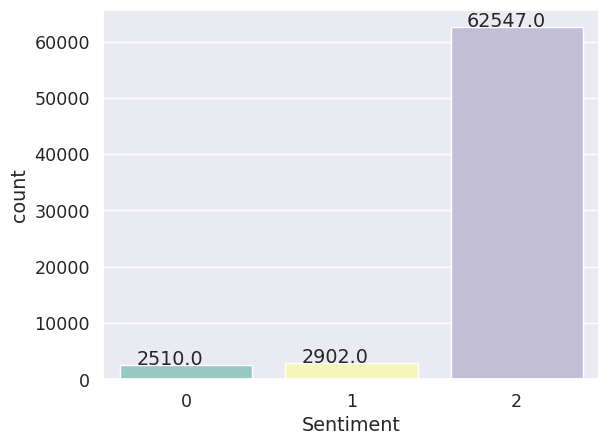

In [52]:
sns.set_theme(style='darkgrid',font_scale=1.15,palette="Set3")
ax=sns.countplot(x='Sentiment',data=data)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [53]:
data['ReviewText'][3]

"I've had my Fire HD 8 two weeks now and I love it. This tablet is a great value.We are Prime Members and that is where this tablet SHINES. I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280/800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing $900 base model. The build on this fire is INSANELY AWESOME running at only 7.7mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futuristic tab in ur hands.Good!!!"

In [55]:
#Plotting wordclouds for positive reviews

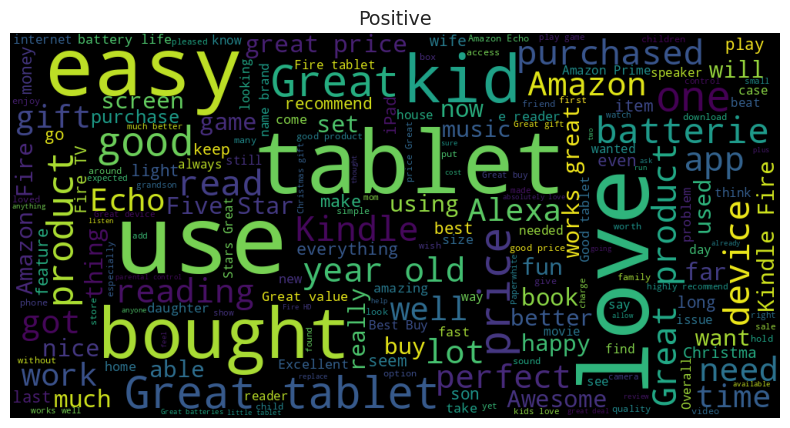

In [56]:
words = ' '.join([w for w in data['ReviewText'][data.Sentiment==2]])
wordCloud = WordCloud(width=1000, height=500, random_state=5, max_font_size=125).generate(words)

plt.figure(figsize=(12,5))
plt.imshow(wordCloud)
plt.title('Positive')
plt.axis('off')
plt.show()

In [57]:
#for negative and neutral reviews

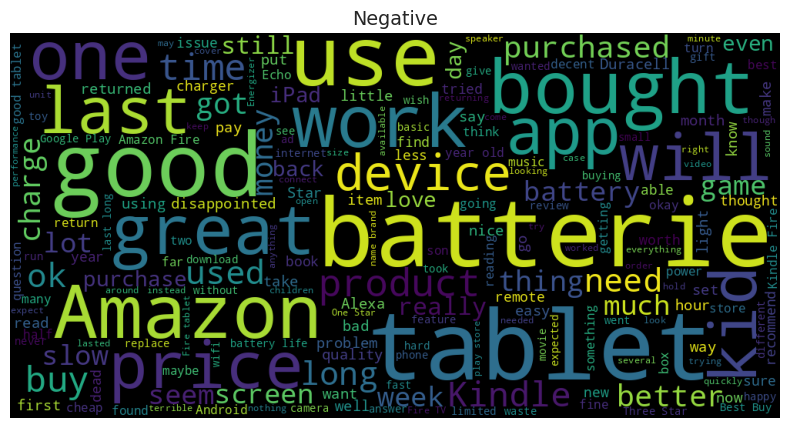

In [58]:
words = ' '.join([w for w in data['ReviewText'][data.Sentiment==0]])
words = words+' '.join([w for w in data['ReviewText'][data.Sentiment==1]])
wordCloud = WordCloud(width=1000, height=500, random_state=5, max_font_size=125).generate(words)

plt.figure(figsize=(12,5))
plt.imshow(wordCloud)
plt.title('Negative')
plt.axis('off')
plt.show()

In [62]:
#Applying VADER (Valence Aware Dictionary and Sentiment Reasoner)
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
data[['neg', 'neu', 'pos', 'compound']] = data['ReviewText'].apply(sid.polarity_scores).apply(pd.Series)
data.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Recommend,Ratings,ReviewText,Sentiment,Subjectivity,Polarity,Analysis,neg,neu,pos,compound
0,True,5.0,This product so far has not disappointed. My c...,2,0.783333,0.325000,Positive,0.000,0.656,0.344,0.8899
1,True,5.0,great for beginner or experienced person. Boug...,2,0.750000,0.600000,Positive,0.000,0.507,0.493,0.8934
2,True,5.0,Inexpensive tablet for him to use and learn on...,2,0.450000,0.350000,Positive,0.000,0.914,0.086,0.4404
3,True,4.0,I've had my Fire HD 8 two weeks now and I love...,2,0.731250,0.399583,Positive,0.036,0.679,0.286,0.9892
4,True,5.0,I bought this for my grand daughter when she c...,2,0.616226,0.368056,Positive,0.000,0.916,0.084,0.7876


In [64]:
#Defining our personlised StopWORDS
stop_WORDS=['myself', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves','him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on','over', 'under', 'further', 'then', 'here', 'there', 'when', 'where', 'why', 'how', 'own', 'so', 'than', 'too', 'very','can','just', 'now']

#NLP

In [65]:
def nlp(df,column_name):
    
    #Convert everything to lowercase
    df[column_name] = df[column_name].str.lower()
    
    #Removing Punctuation, Numbers, and Special Characters
    df[column_name] = df[column_name].str.replace("[^a-zA-Z!'#]"," ")
    
    #Remove Stopwords
    df[column_name].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_WORDS)]))
    
    #Data Tokenization
    data_tokenized = df[column_name].apply(lambda x : x.split())
    
    #Removing words having length<3
    data_tokenized = data_tokenized.apply(lambda x: [w for w in x if len(w)>2])
    
    #Stemming
    stemmer = PorterStemmer()
    data_tokenized = data_tokenized.apply(lambda x: [stemmer.stem(i) for i in x])
    
    #Lemmatization
    #lemmatizer = WordNetLemmatizer()
    #data_tokenized = data_tokenized.apply(lambda x: [lemmatizer.lemmatize(i,wordnet.VERB) for i in x])
    
    #Putting tokens back together
    data_tokenized=data_tokenized.apply(lambda x:' '.join(x))
    df[column_name] = data_tokenized

In [66]:
nlp(data,'ReviewText')

<ipython-input-65-b7bb64053eae>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column_name] = df[column_name].str.replace("[^a-zA-Z!'#]"," ")


In [67]:
data.head()

,Recommend,Ratings,ReviewText,Sentiment,Subjectivity,Polarity,Analysis,neg,neu,pos,compound
0,True,5.0,thi product far ha not disappoint children lov...,2,0.783333,0.325000,Positive,0.000,0.656,0.344,0.8899
1,True,5.0,great for beginn experienc person bought gift ...,2,0.750000,0.600000,Positive,0.000,0.507,0.493,0.8934
2,True,5.0,inexpens tablet for him use and learn step fro...,2,0.450000,0.350000,Positive,0.000,0.914,0.086,0.4404
3,True,4.0,i'v had fire two week now and love thi tablet ...,2,0.731250,0.399583,Positive,0.036,0.679,0.286,0.9892
4,True,5.0,bought thi for grand daughter when she come ov...,2,0.616226,0.368056,Positive,0.000,0.916,0.084,0.7876


In [68]:
#Feature Engineering and Selection

In [72]:
#CountVectorizer 
count_vect = CountVectorizer(max_features=1000,max_df=0.80, min_df=2)

X = count_vect.fit_transform(data['ReviewText'])

#cv_df = pd.DataFrame(X.todense())

cv = pd.DataFrame(X.toarray(), columns=count_vect.vocabulary_.keys())
cv.head()



,thi,product,far,ha,not,disappoint,children,love,use,and,...,nest,bulb,playstat,vue,aaa,duracel,energ,batteries,alkalin,pricef
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [74]:
#TF-IDF : Term Frequency-Inverse Document Frequency 
tfidf_vect = TfidfVectorizer(max_df=0.80, min_df=2,max_features=1000)

features = tfidf_vect.fit_transform(data['ReviewText'])

tfidf = pd.DataFrame(features.toarray(), columns=tfidf_vect.vocabulary_.keys())
tfidf_df = pd.DataFrame(X.todense())
print(tfidf_df.shape)
tfidf.head()

(67959, 1000)


,thi,product,far,ha,not,disappoint,children,love,use,and,...,nest,bulb,playstat,vue,aaa,duracel,energ,batteries,alkalin,pricef
0,0.0,0.299381,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.181235,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.110449,0.0,0.0,0.121131,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.072844,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.104659,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.062938,0.0,0.0,0.0,0.0


In [75]:
y = data ['Sentiment']

Divide the dataset into Train and Test

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=81)

In [77]:
print('Train Set Shape:{}\nTest Set Shape:{}'.format(X_train.shape, X_test.shape))

Train Set Shape:(47571, 1000)
Test Set Shape:(20388, 1000)


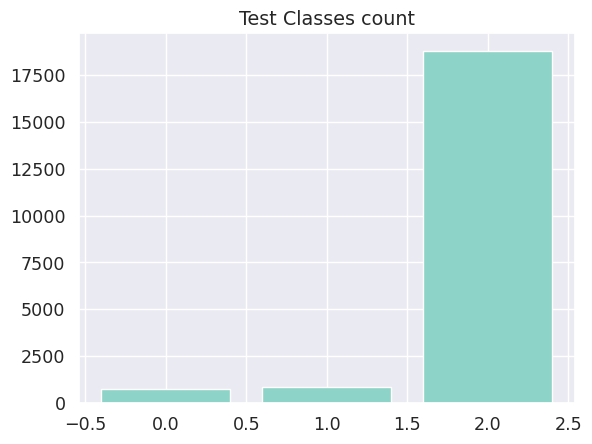

In [78]:
counts=y_test.value_counts()
plt.title("Test Classes count")
plt.bar(counts.index, counts.values)
plt.show()

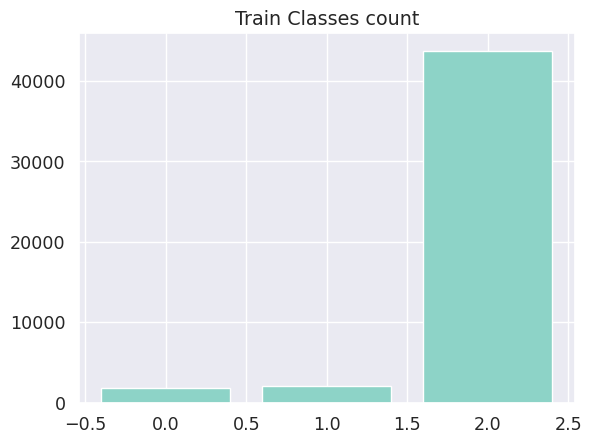

In [79]:
counts=y_train.value_counts()
plt.title("Train Classes count")
plt.bar(counts.index, counts.values)
plt.show()

In [80]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_tr = classifier.predict(X_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
from sklearn.metrics import classification_report
print("Classification Report(Train)")
print(classification_report(y_train, y_pred_tr))
print("Classification Report(Test)")
print(classification_report(y_test, y_pred))

Classification Report(Train)
              precision    recall  f1-score   support

           0       0.83      0.68      0.75      1794
           1       0.70      0.33      0.45      2034
           2       0.96      0.99      0.98     43743

    accuracy                           0.95     47571
   macro avg       0.83      0.67      0.73     47571
weighted avg       0.95      0.95      0.95     47571

Classification Report(Test)
              precision    recall  f1-score   support

           0       0.72      0.60      0.65       716
           1       0.51      0.25      0.34       868
           2       0.96      0.99      0.97     18804

    accuracy                           0.94     20388
   macro avg       0.73      0.61      0.66     20388
weighted avg       0.93      0.94      0.93     20388



Text(0.5, 1.0, 'Confusion Matrix')

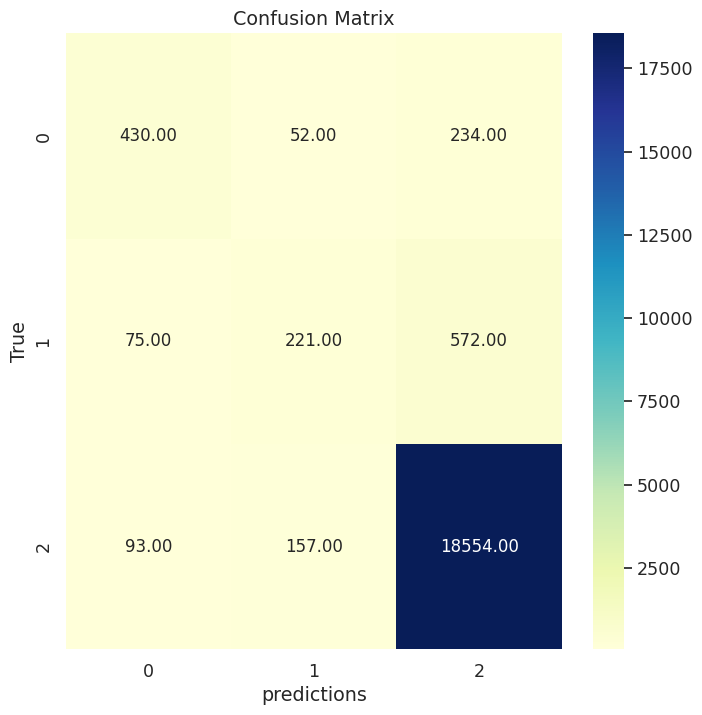

In [82]:
confusion_matrix = pd.crosstab(index=y_test, columns=np.round(y_pred), rownames=['True'], colnames=['predictions']).astype(int)
plt.figure(figsize = (8,8))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"fontsize":12}, fmt='.2f', cmap='YlGnBu').set_title('Confusion Matrix') 

In [83]:
#Naive Bayes

In [84]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_tr = classifier.predict(X_train)

In [85]:
from sklearn.metrics import classification_report
print("Classification Report(Train)")
print(classification_report(y_train, y_pred_tr))
print("Classification Report(Test)")
print(classification_report(y_test, y_pred))

Classification Report(Train)
              precision    recall  f1-score   support

           0       0.37      0.64      0.47      1794
           1       0.30      0.38      0.33      2034
           2       0.97      0.93      0.95     43743

    accuracy                           0.89     47571
   macro avg       0.55      0.65      0.58     47571
weighted avg       0.92      0.89      0.90     47571

Classification Report(Test)
              precision    recall  f1-score   support

           0       0.36      0.66      0.47       716
           1       0.27      0.36      0.31       868
           2       0.97      0.92      0.95     18804

    accuracy                           0.89     20388
   macro avg       0.53      0.65      0.57     20388
weighted avg       0.92      0.89      0.90     20388



Text(0.5, 1.0, 'Confusion Matrix')

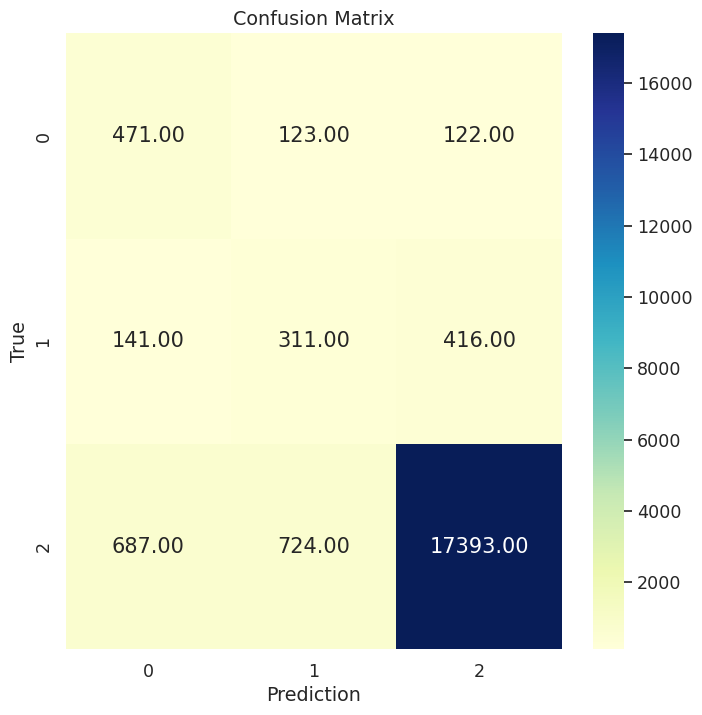

In [86]:
confusion_matrix = pd.crosstab(index=y_test, columns=np.round(y_pred), rownames=['True'], colnames=['Prediction']).astype(int)
plt.figure(figsize = (8,8))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"fontsize":15}, fmt='.2f', cmap='YlGnBu').set_title('Confusion Matrix') 

In [87]:
#LightGBM

In [88]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')   
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [89]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(objective="multiclass",is_unbalance=True,num_class=3)
clf.fit(X_train, y_train,5000)

# predict the results
y_pred=clf.predict(X_test)
y_pred_tr = classifier.predict(X_train)

In [90]:
from sklearn.metrics import classification_report
print("Classification Report(Train)")
print(classification_report(y_train, y_pred_tr))
print("Classification Report(Test)")
print(classification_report(y_test, y_pred))

Classification Report(Train)
              precision    recall  f1-score   support

         0.0       0.37      0.64      0.47      1794
         1.0       0.30      0.38      0.33      2034
         2.0       0.97      0.93      0.95     43743

    accuracy                           0.89     47571
   macro avg       0.55      0.65      0.58     47571
weighted avg       0.92      0.89      0.90     47571

Classification Report(Test)
              precision    recall  f1-score   support

         0.0       0.80      0.62      0.70       716
         1.0       0.76      0.26      0.39       868
         2.0       0.96      0.99      0.98     18804

    accuracy                           0.95     20388
   macro avg       0.84      0.62      0.69     20388
weighted avg       0.94      0.95      0.94     20388



Text(0.5, 1.0, 'Confusion Matrix')

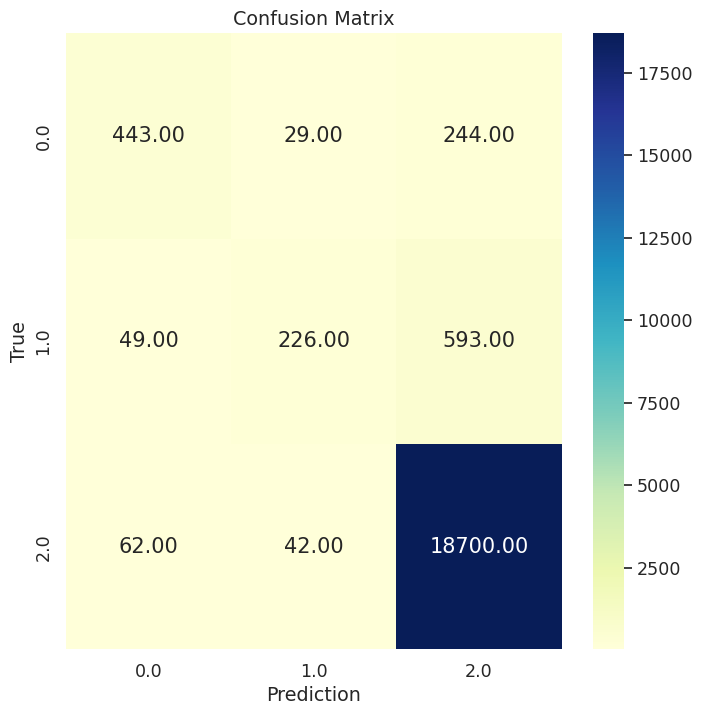

In [92]:
confusion_matrix = pd.crosstab(index=y_test, columns=np.round(y_pred), rownames=['True'], colnames=['Prediction']).astype(int)
plt.figure(figsize = (8,8))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"fontsize":15}, fmt='.2f', cmap='YlGnBu').set_title('Confusion Matrix') 